<a href="https://colab.research.google.com/github/eswarreddy08/Brain-stroke-prediction/blob/main/ml_project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
data_set= pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
print(data_set)

         id  gender   age  hypertension  heart_disease  ever_married  \
0      9046       1  67.0             0              1             1   
1     51676       0  61.0             0              0             1   
2     31112       1  80.0             0              1             1   
3     60182       0  49.0             0              0             1   
4      1665       0  79.0             1              0             1   
...     ...     ...   ...           ...            ...           ...   
5105  18234       0  80.0             1              0             1   
5106  44873       0  81.0             0              0             1   
5107  19723       0  35.0             0              0             1   
5108  37544       1  51.0             0              0             1   
5109  44679       0  44.0             0              0             1   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  \
0             1               0             228.69  36.6   

In [ ]:
data_set.corr()["stroke"]

id                   0.006388
gender               0.008929
age                  0.245257
hypertension         0.127904
heart_disease        0.134914
ever_married         0.108340
work_type           -0.077113
Residence_type      -0.015458
avg_glucose_level    0.131945
bmi                 -0.051791
smoking_status      -0.055147
stroke               1.000000
Name: stroke, dtype: float64

<Axes: >

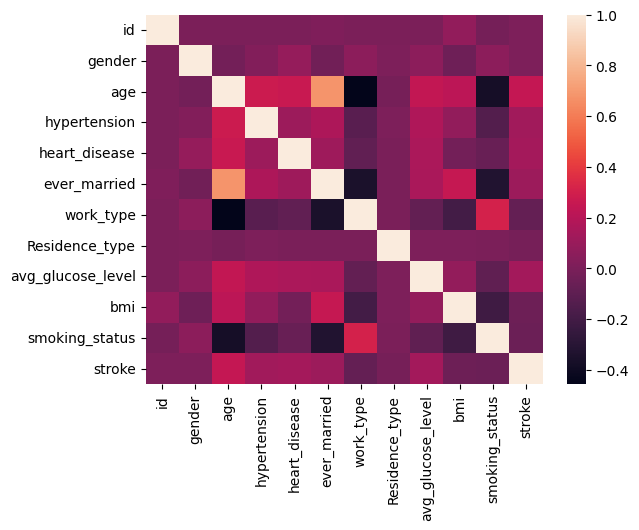

In [ ]:
corr_matrix=data_set.corr()
sb.heatmap(corr_matrix)

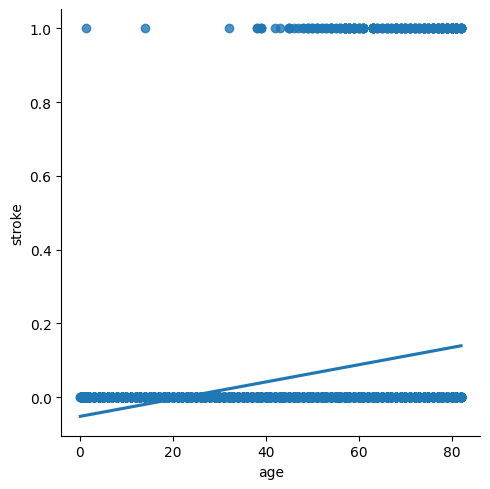

In [ ]:
#To find the linear regression
sb.lmplot(x="age",y="stroke",data=data_set,fit_reg=True,ci=None)

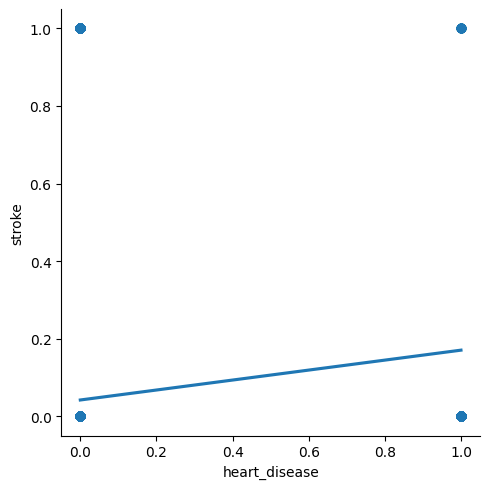

In [ ]:
sb.lmplot(x="heart_disease",y="stroke",data=data_set,fit_reg=True,ci=None)

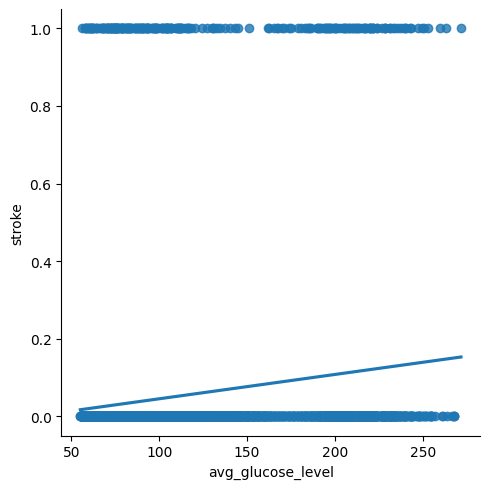

In [ ]:
sb.lmplot(x="avg_glucose_level",y="stroke",data=data_set,fit_reg=True,ci=None)

In [ ]:
data_set=data_set[["age","heart_disease","avg_glucose_level","hypertension","stroke"]]
print(data_set)

       age  heart_disease  avg_glucose_level  hypertension  stroke
0     67.0              1             228.69             0       1
1     61.0              0             202.21             0       1
2     80.0              1             105.92             0       1
3     49.0              0             171.23             0       1
4     79.0              0             174.12             1       1
...    ...            ...                ...           ...     ...
5105  80.0              0              83.75             1       0
5106  81.0              0             125.20             0       0
5107  35.0              0              82.99             0       0
5108  51.0              0             166.29             0       0
5109  44.0              0              85.28             0       0

[5110 rows x 5 columns]


In [ ]:
x= data_set.iloc[:,0:3].values
y= data_set.iloc[:, 4].values
print(x)
print(y)

[[ 67.     1.   228.69]
 [ 61.     0.   202.21]
 [ 80.     1.   105.92]
 ...
 [ 35.     0.    82.99]
 [ 51.     0.   166.29]
 [ 44.     0.    85.28]]
[1 1 1 ... 0 0 0]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred= classifier.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[1162   51]
 [  58    7]]


<Axes: xlabel='stroke', ylabel='count'>

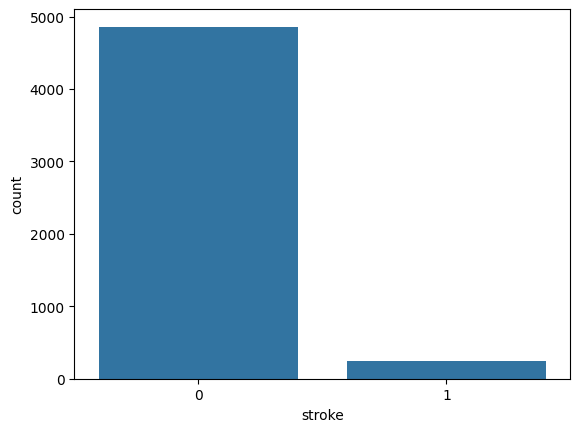

In [ ]:
sb.countplot(data_set,x='stroke')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'heart_disease'}>],
       [<Axes: title={'center': 'avg_glucose_level'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'stroke'}>, <Axes: >]], dtype=object)

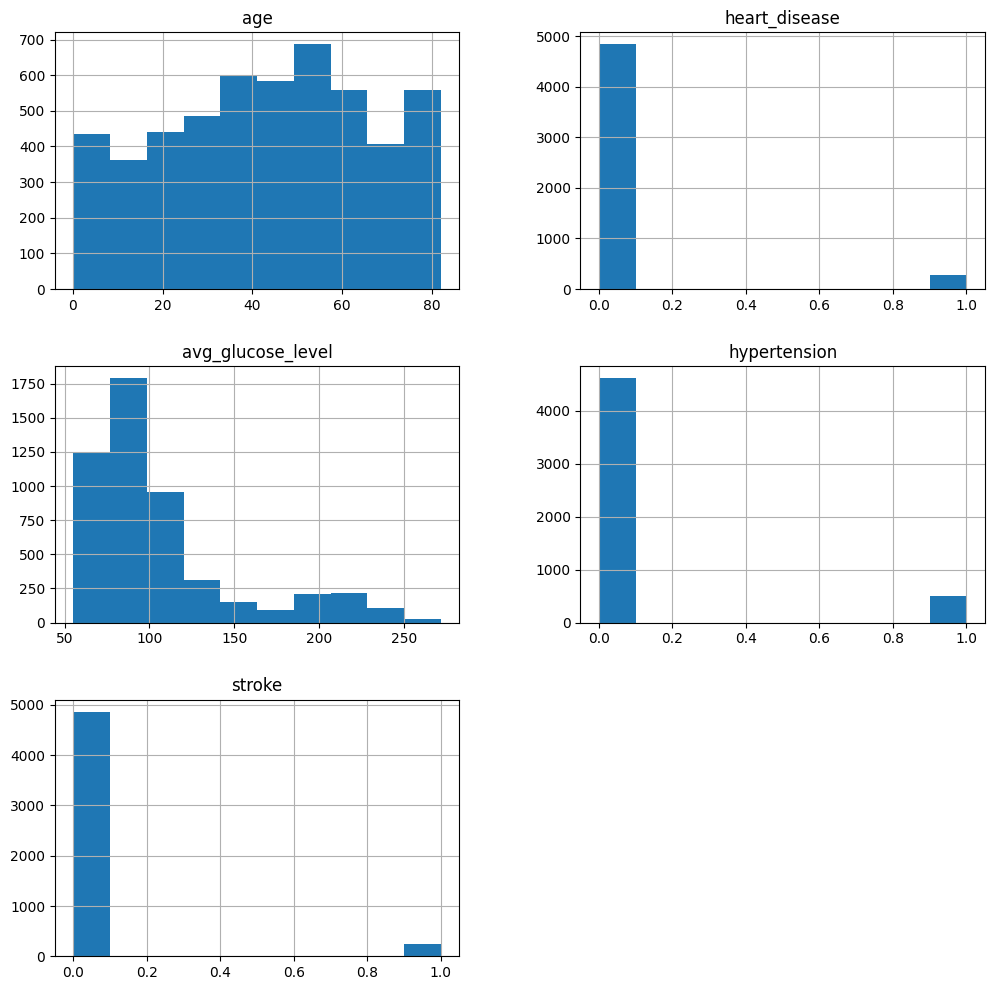

In [ ]:
data_set.hist(figsize=(12,12))

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset (replace 'dataset.csv' with your actual dataset)
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Preprocessing: Handle missing values, encode categorical variables, etc.
# Assuming 'stroke' is the target variable
# Remove any columns that shouldn't be used as features

# Split the data into features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.9403131115459883
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       960
           1       1.00      0.02      0.03        62

    accuracy                           0.94      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.94      0.94      0.91      1022



In [ ]:
x = int(input("enter age"));
y = float(input("enter Avg_glucose"));
z= int(input("Heart_disease"))
feature = nm.array([[x,y,z]])
feature = st_x.transform(feature)
p = classifier.predict(feature)
print(p)

enter age69
enter Avg_glucose228.69
Heart_disease1
[0]
